In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 736.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO("yolo11n-seg.pt")
results = model("https://ultralytics.com/images/bus.jpg")

100%|██████████| 5.90M/5.90M [00:00<00:00, 65.4MB/s]


100%|██████████| 134k/134k [00:00<00:00, 4.83MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 588.4ms
Speed: 23.4ms preprocess, 588.4ms inference, 76.7ms postprocess per image at shape (1, 3, 640, 480)


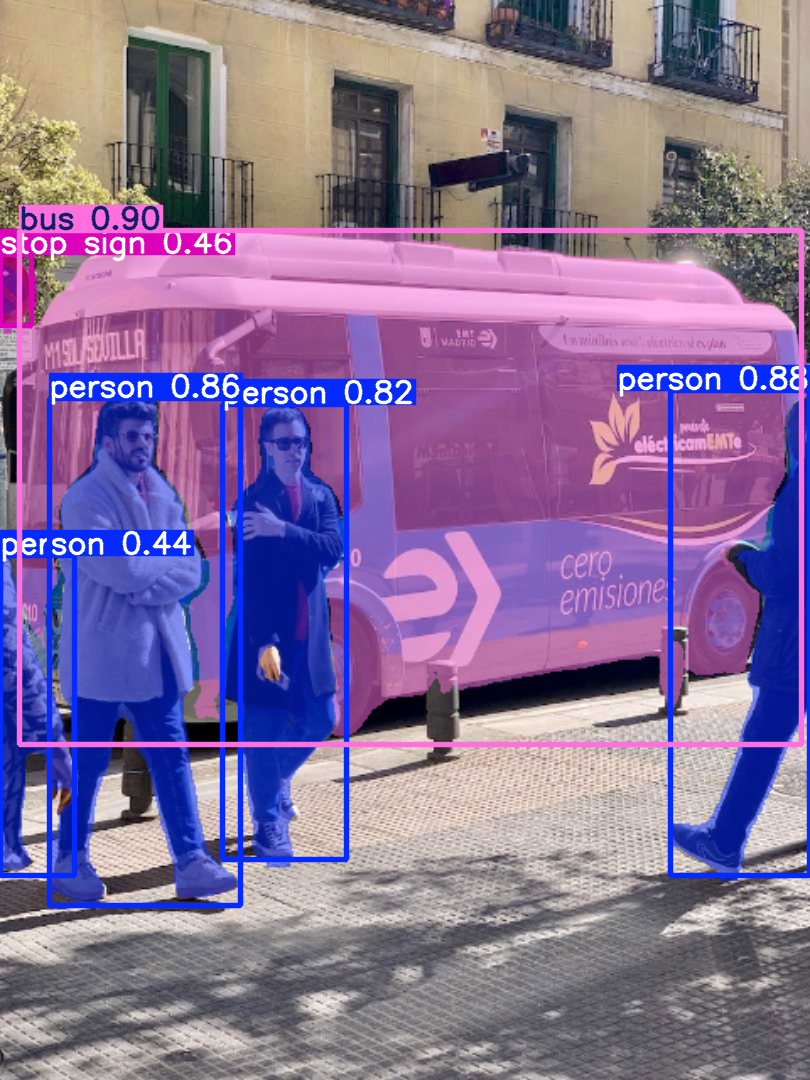

In [5]:
for result in results:
  result.show()

In [10]:
for result in results:
    masks = result.masks
    boxes = result.boxes
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes.xyxy[i]
        confidence = boxes.conf[i]
        class_id = boxes.cls[i]

        print(f"Detection {i+1}:")
        print("Coordinates:", x1.numpy(), y1.numpy(), x2.numpy(), y2.numpy())
        print("Confidence:", confidence.numpy())
        print("Class ID:", class_id.numpy())

        if masks is not None:
            mask = masks[i]
            print("Mask shape:", mask.shape)

    print("-" * 50)


Detection 1:
Coordinates: 19.682848 230.02783 801.79205 744.13916
Confidence: 0.898529
Class ID: 5.0
Mask shape: torch.Size([1, 640, 480])
Detection 2:
Coordinates: 670.1438 390.57312 809.55145 875.29236
Confidence: 0.88492924
Class ID: 0.0
Mask shape: torch.Size([1, 640, 480])
Detection 3:
Coordinates: 49.48727 398.12775 240.75569 905.0868
Confidence: 0.862807
Class ID: 0.0
Mask shape: torch.Size([1, 640, 480])
Detection 4:
Coordinates: 222.64917 404.5438 346.05872 859.8911
Confidence: 0.8223414
Class ID: 0.0
Mask shape: torch.Size([1, 640, 480])
Detection 5:
Coordinates: 0.1144681 254.5801 31.95924 325.64923
Confidence: 0.46114781
Class ID: 11.0
Mask shape: torch.Size([1, 640, 480])
Detection 6:
Coordinates: 0.0 555.3336 74.81789 875.01697
Confidence: 0.44277602
Class ID: 0.0
Mask shape: torch.Size([1, 640, 480])
--------------------------------------------------
